# Figure X.x - Supervised model performance

Goals : 

- Show that 3D models outperform usual 2D models

In [38]:
import numpy as np
from tifffile import imread
import sys
import numpy as np

import pyclesperanto_prototype as cle
from stardist.matching import matching_dataset
sys.path.append("../..")

from utils import *
from plots import *
print("Used GPU: ", cle.get_device())
show_params()

Used GPU:  <Intel(R) UHD Graphics 620 on Platform: Intel(R) OpenCL (2 refs)>
Plot parameters (set in plots.py) : 
- COLORMAP : ██████████
- DPI : 200
- Data path : C:\Users\Cyril\Desktop\Code\CELLSEG_BENCHMARK
- Font size : 15
- Title font size : 26
- Label font size : 18


In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data

In [40]:
data_path = DATA_PATH / "RESULTS/SUPERVISED_PERF_FIG/INFERENCE"
image = imread(data_path / "visual.tif")
labels_gt = imread(data_path / "GT_visual.tif")

In [41]:
swin = imread(data_path / "Swin/Swin_latest_pred.tif")
segresnet = imread(data_path / "SegResNet/SegResNet_latest_pred.tif")
#####
cellpose = imread(data_path / "cellpose/visual_cp_masks.tif")

## Computations

In [42]:
swin_thresholded = np.where(swin > 0.5, swin, 0)
segresnet_thresholded = np.where(segresnet > 0.45, segresnet, 0)

In [43]:
swin_instance = cle.voronoi_otsu_labeling(swin_thresholded, spot_sigma=0.65, outline_sigma=0.65)
segresnet_instance = cle.voronoi_otsu_labeling(segresnet_thresholded, spot_sigma=0.65, outline_sigma=0.65)
swin_instance = np.array(swin_instance)
segresnet_instance = np.array(segresnet_instance)

In [44]:
# save_folder = data_path / "processed"
# save_folder.mkdir(exist_ok=True, parents=False)
# from tifffile import imwrite
# imwrite(save_folder / "swin_instance.tif", swin_instance)
# imwrite(save_folder / "segresnet_instance.tif", segresnet_instance)

## Plots

Validating on Swin
********************
Validating on SegResNet
********************
Validating on Cellpose
********************


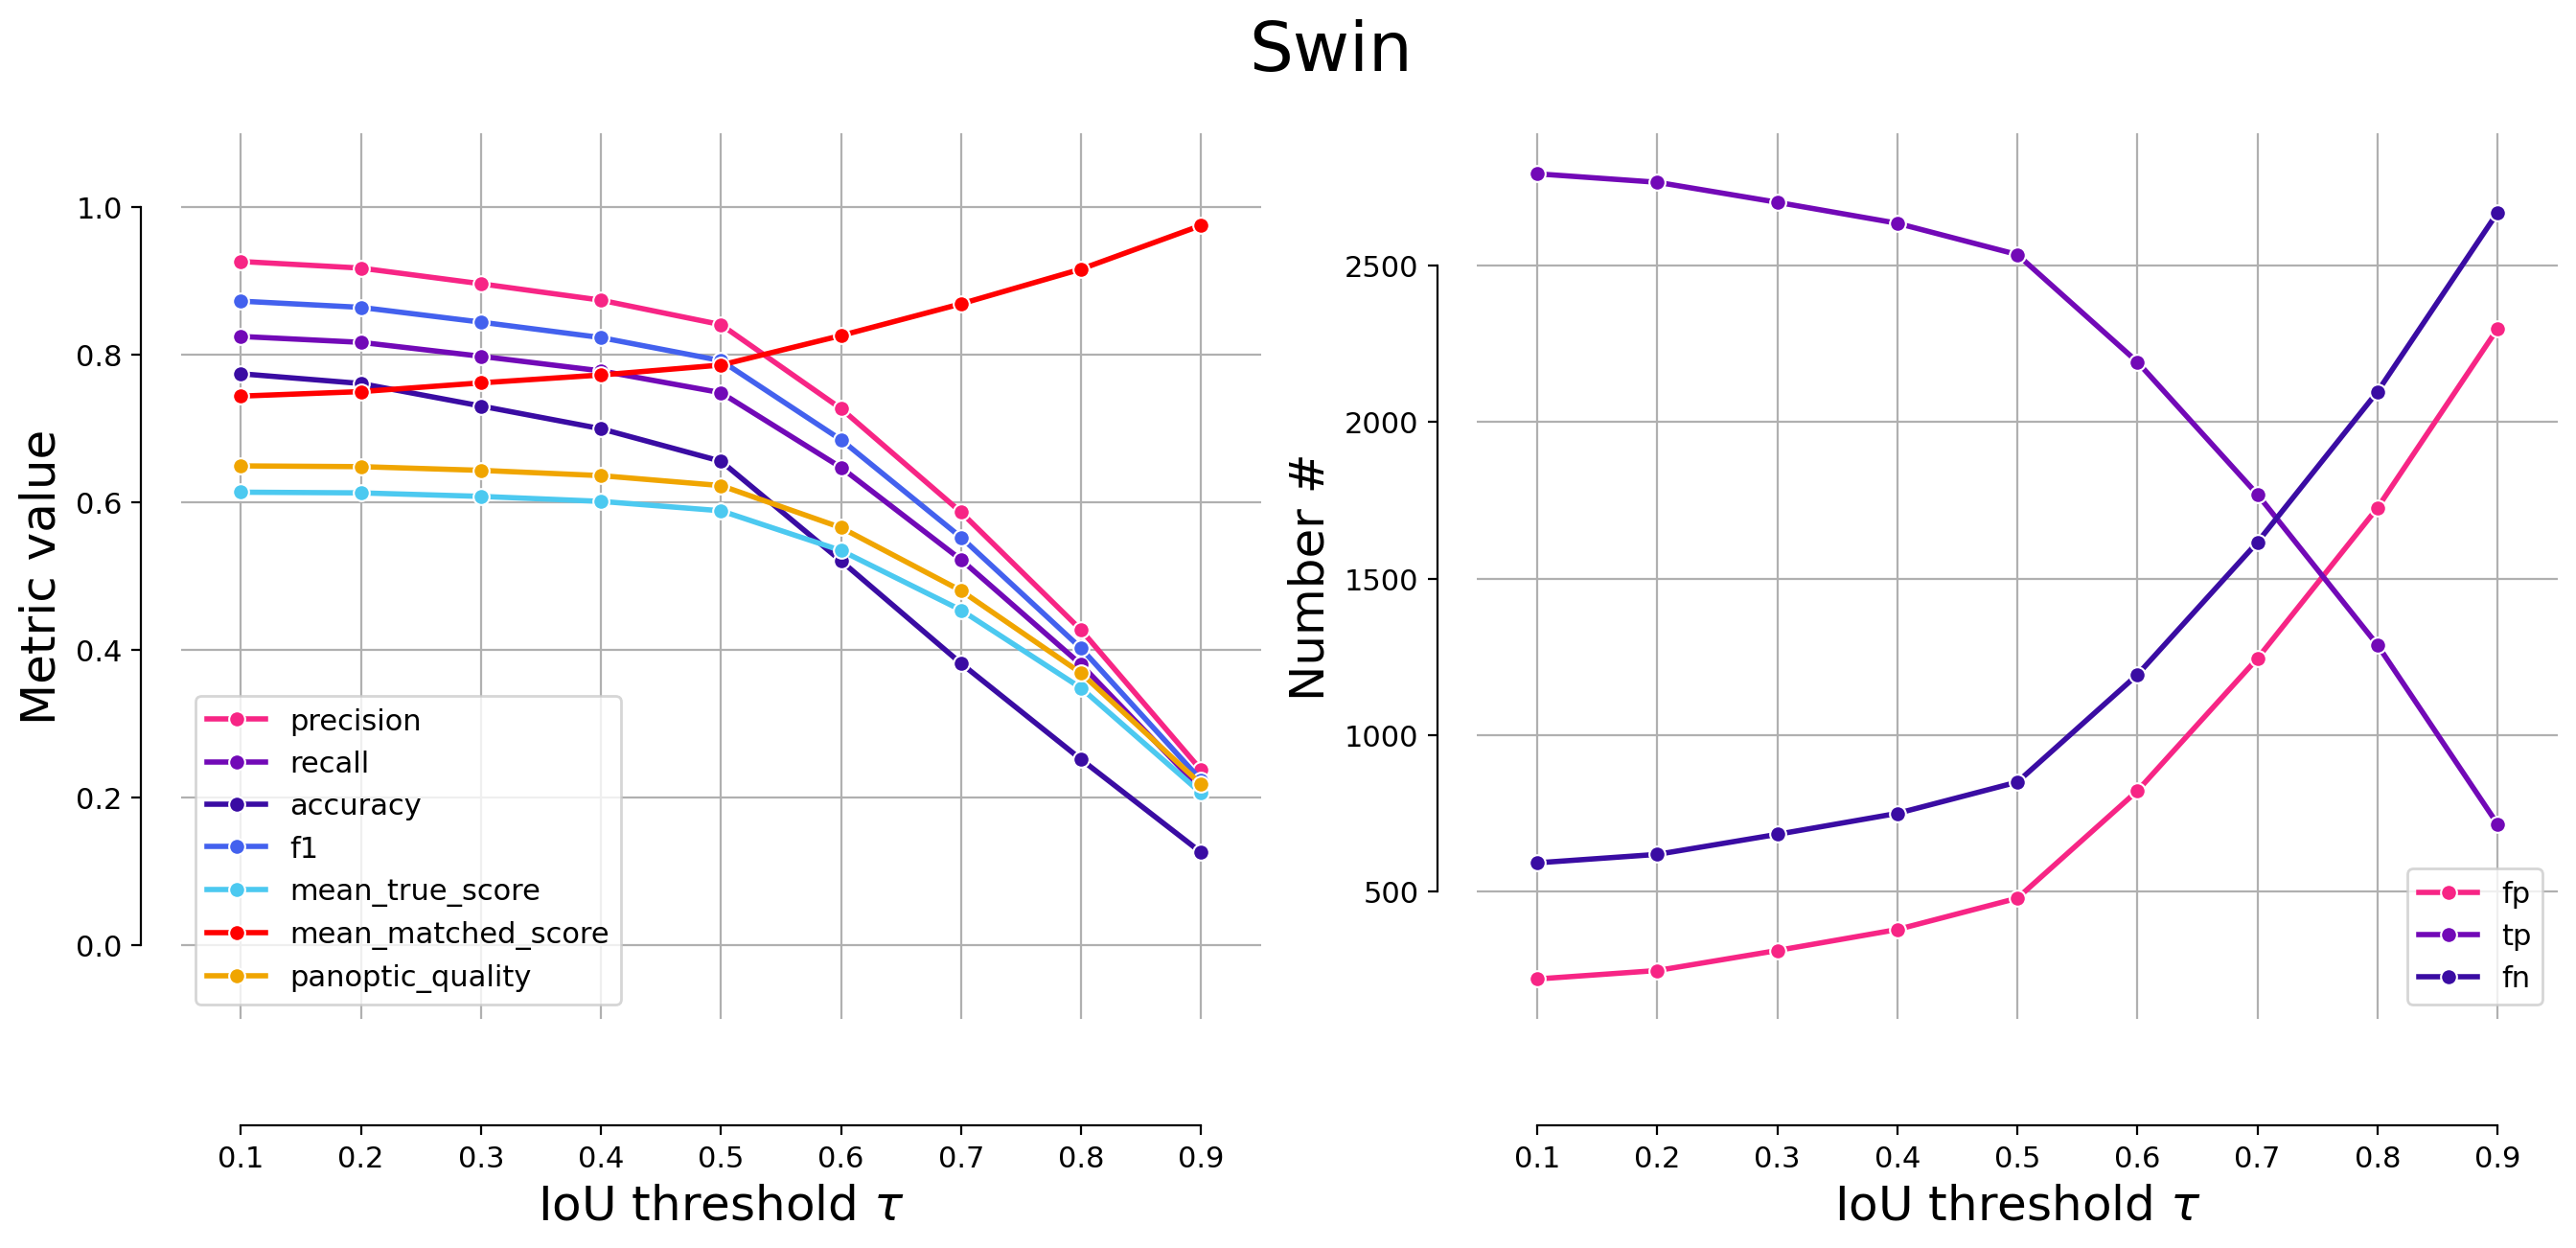

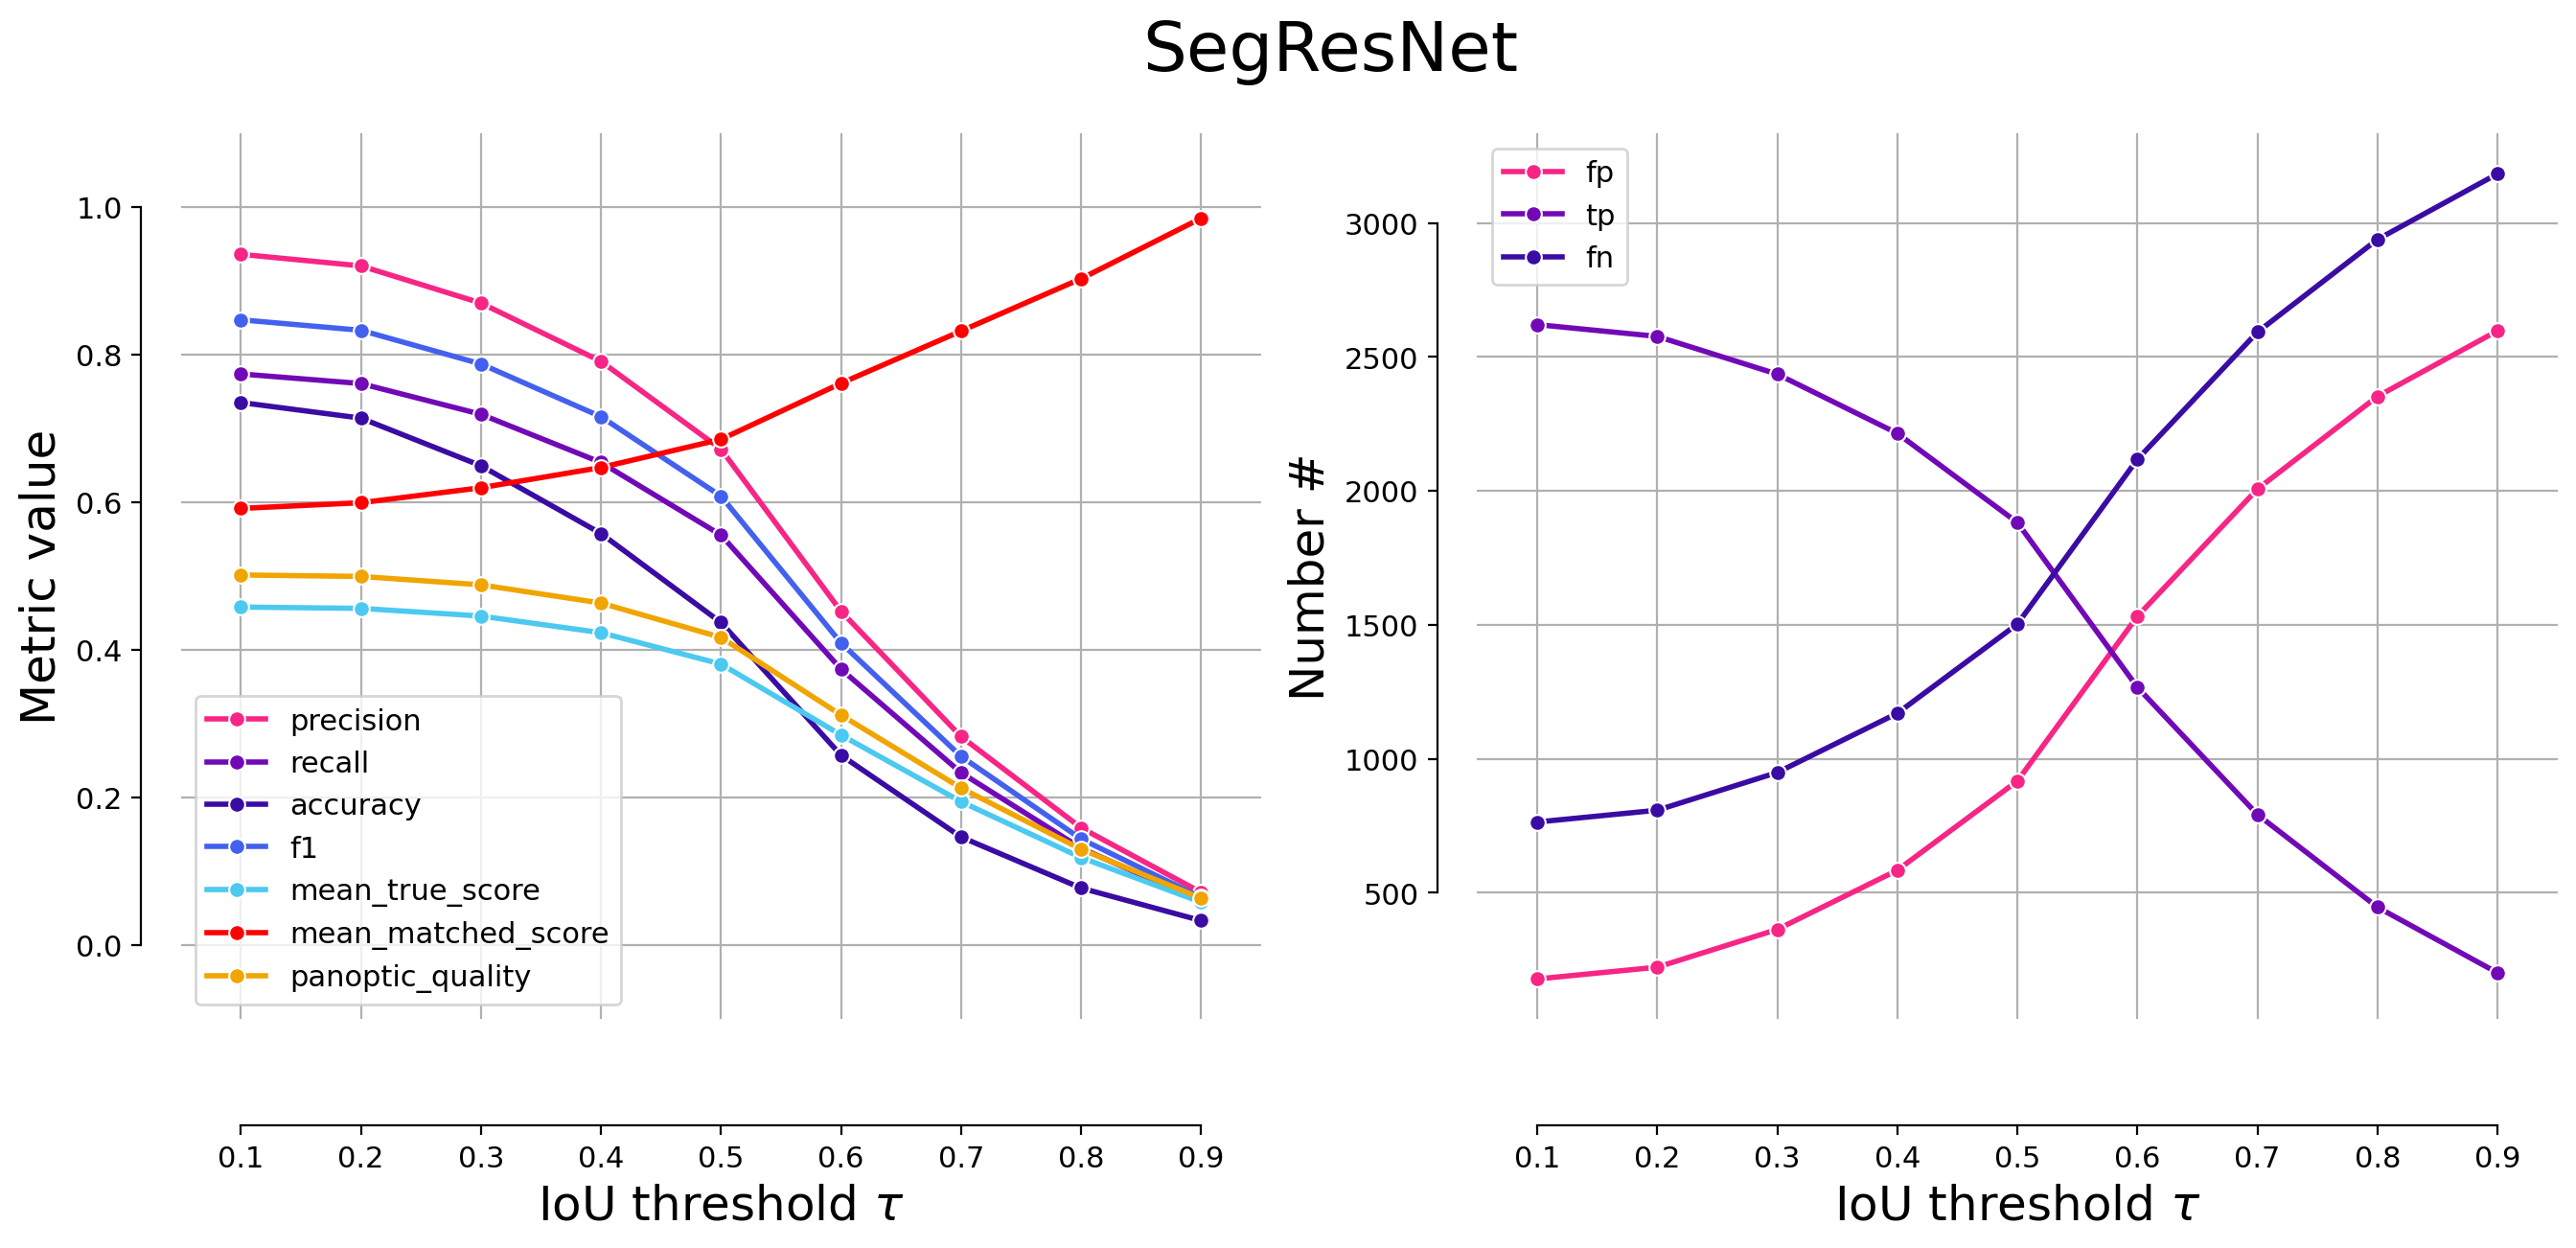

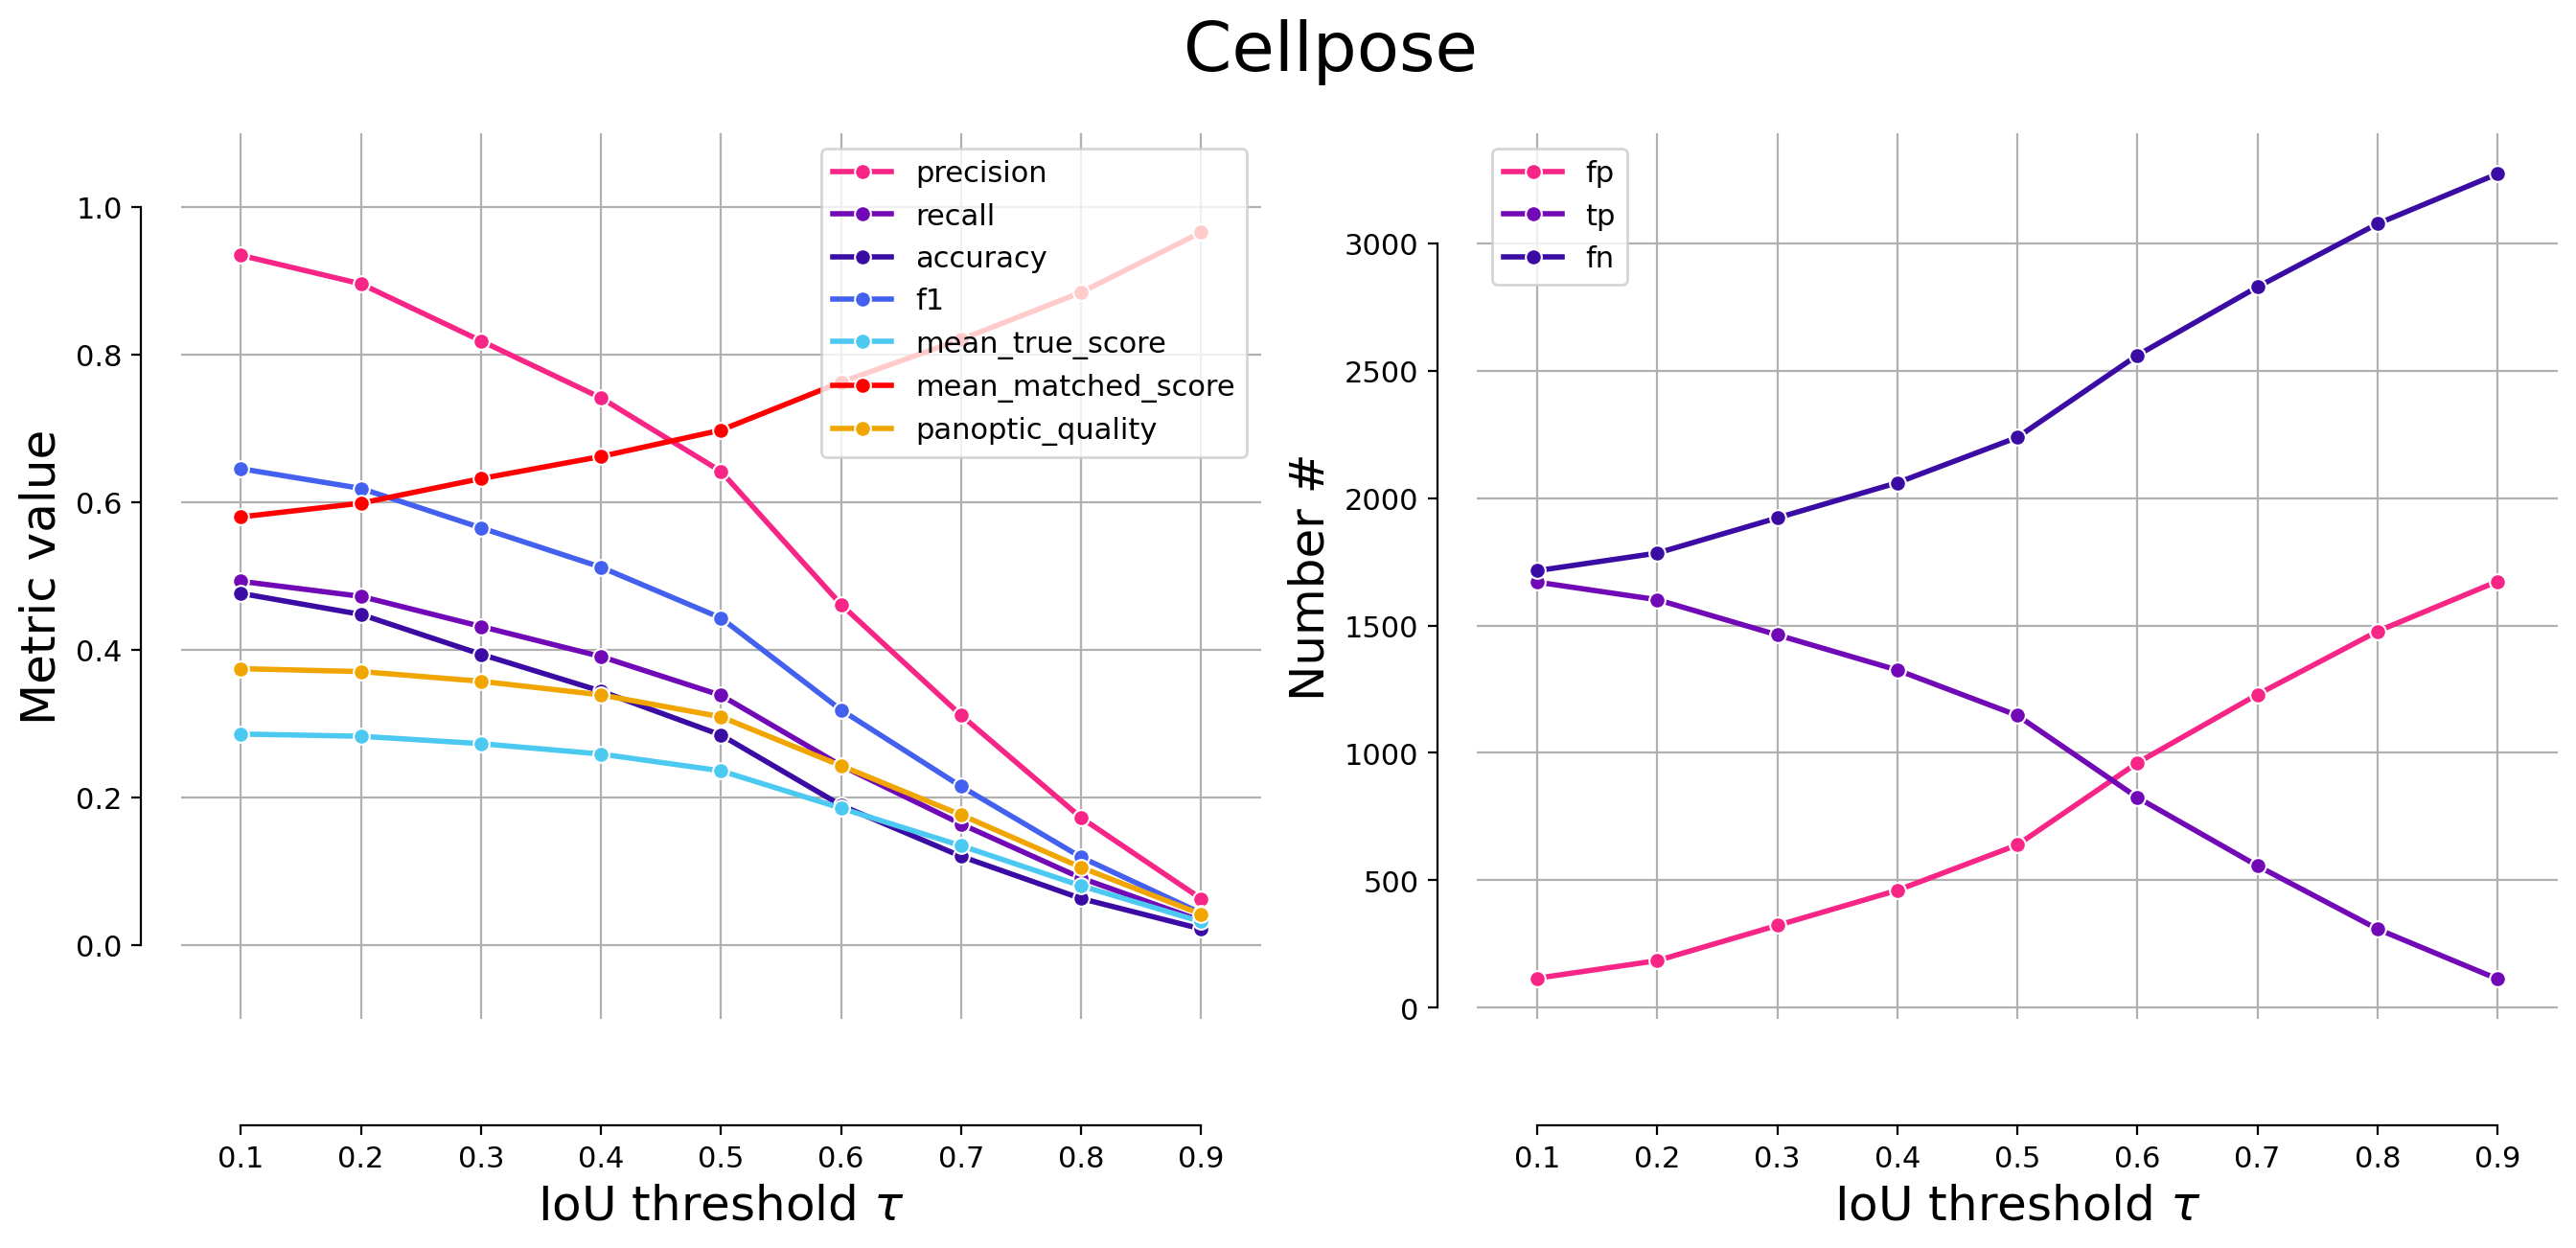

In [45]:
taus = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

predictions = [swin_instance, segresnet_instance, cellpose]
names = ["Swin", "SegResNet", "Cellpose"]

model_stats = []
dfs = []

for i, p in enumerate(predictions):
    print(f"Validating on {names[i]}")
    stats = [matching_dataset(
        labels_gt, p, thresh=t, show_progress=False
        ) for t in taus]
    model_stats.append(stats)
    plot_performance(taus, stats, name=names[i])
    print("*"*20)

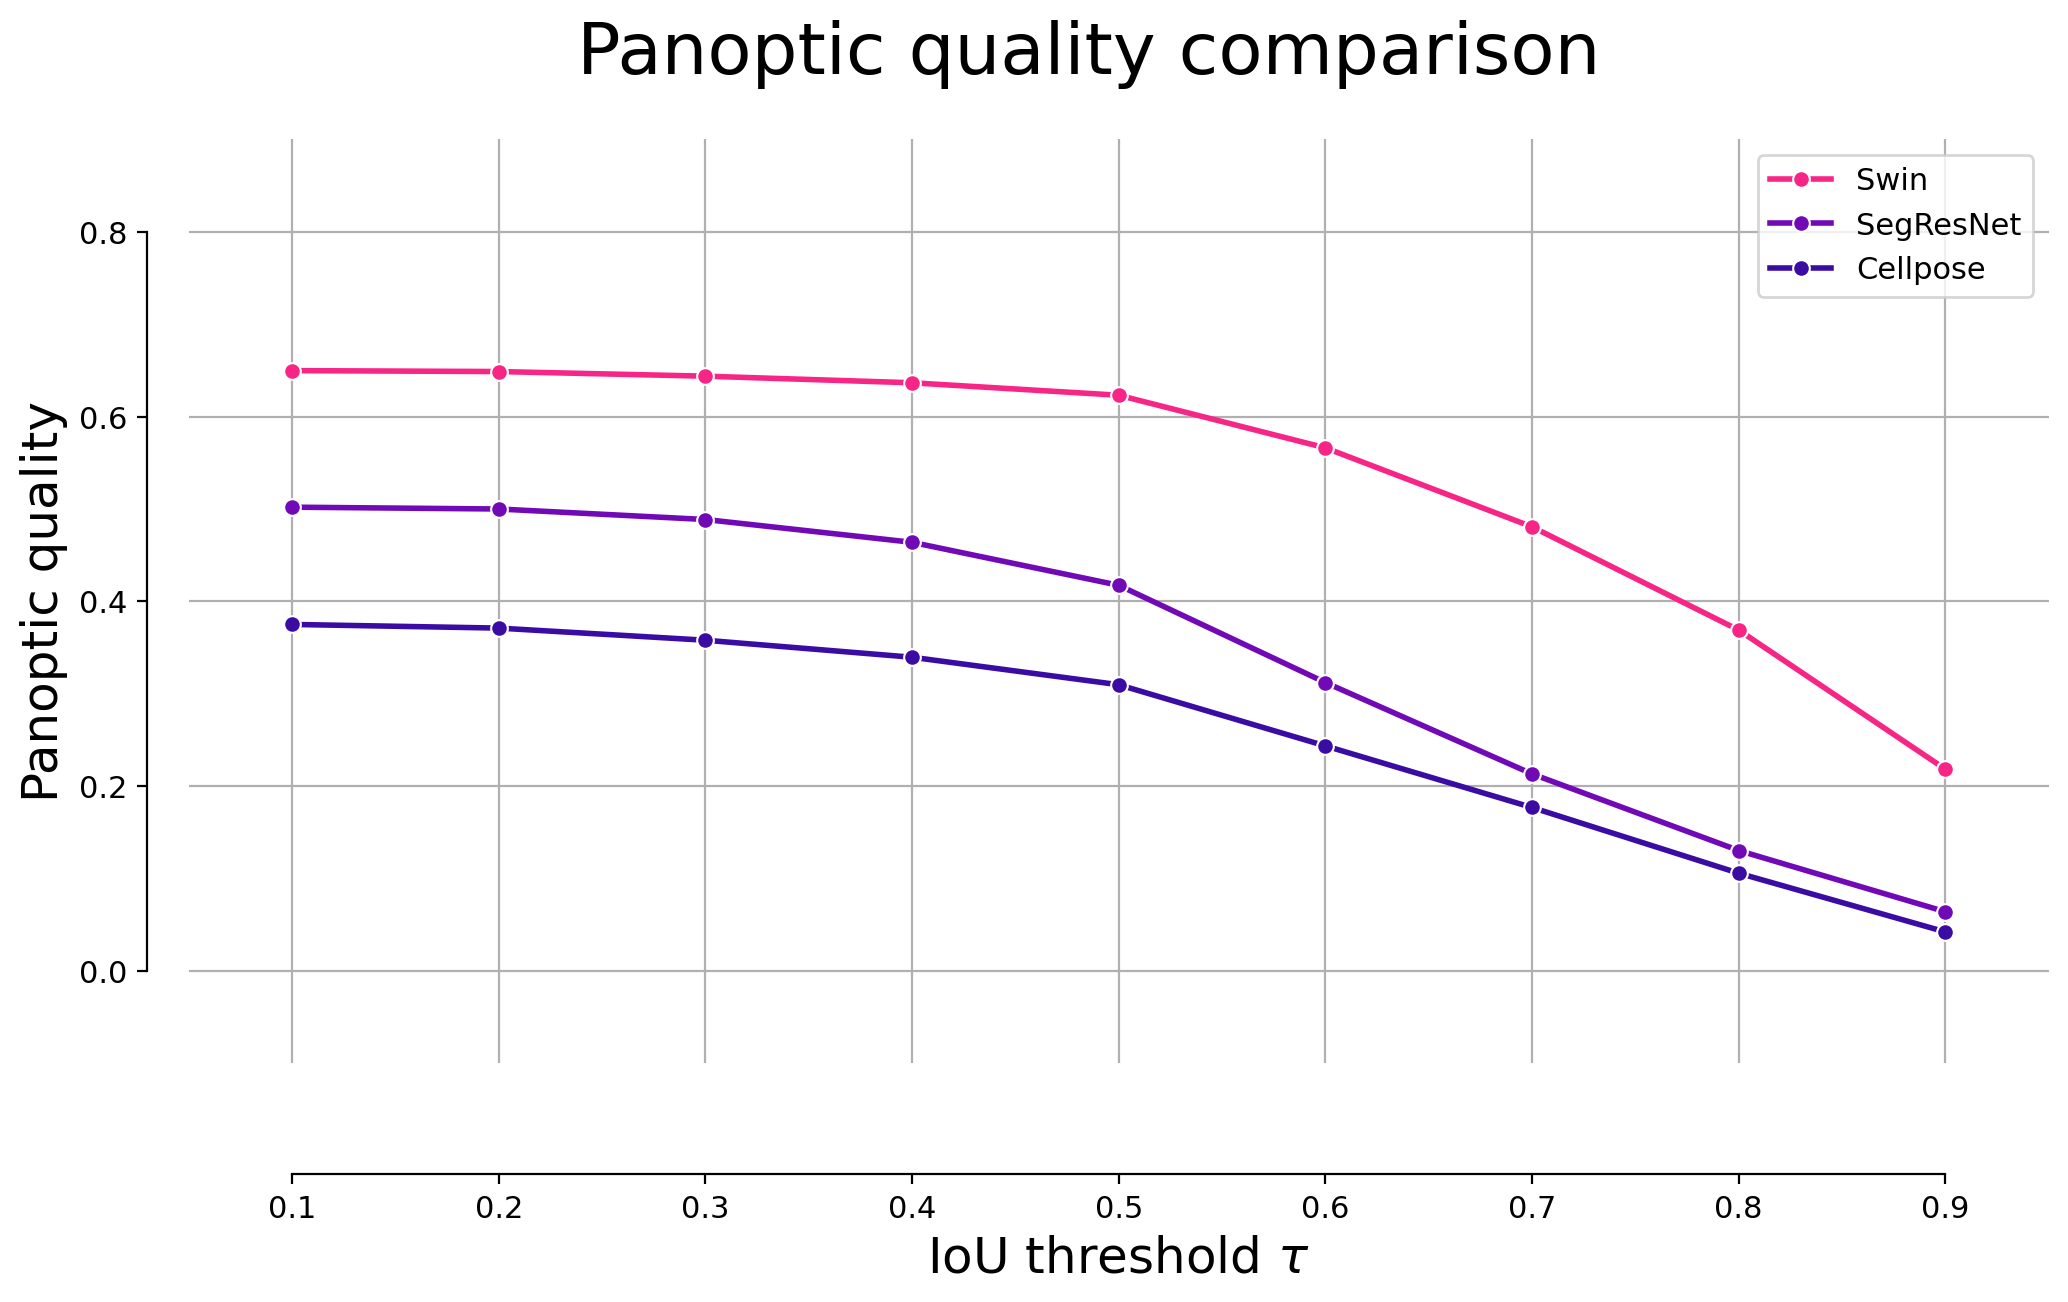

In [46]:
plot_stat_comparison(taus, model_stats, names, stat="panoptic_quality")